## Importing Required Libraries

In [4]:
# !pip install gensim

In [5]:
import numpy as np
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus
from IPython.display import display, Markdown
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load the Text8 Dataset
The **Text8 dataset** is a large-scale dataset extracted from Wikipedia, often used for training word embeddings.  
It consists of approximately 17 million words in a single text file, formatted as a sequence of words without punctuation.

In this step, you will:
1. **Download the Text8 dataset** using Gensim's downloader.
2. **Convert it to a list named text8_corpus** to use it for training.

In [6]:
# Your Code Here
import gensim.downloader as api
corpus = api.load('text8')
#text8_corpus = np.array([str(word) for sentence in list(corpus) for word in sentence])
#text8_corpus = [str(word) for sentence in list(corpus) for word in sentence]

[==================================================] 100.0% 31.6/31.6MB downloaded


In [7]:
text8_corpus = [sentence for sentence in list(corpus)]

In [8]:
# text8_corpus[:1]

In [9]:
len(text8_corpus)

1701

In [10]:
# for item in text8_corpus[:1]:
#     print(type(item))

## Train a Word2Vec Model in CBOW Mode

In this step, you will initialize a Word2Vec model and train it using a specific architecture.  
The model will learn word representations based on a **context-predicting approach**, where surrounding words help predict the target word.  

Consider the impact of different parameters such as:
- The size of the word representations(e.g., 300 dimensions).
- The number of neighboring words considered(e.g., 5 neighbors).
- The minimum occurrences required for a word to be included in the vocabulary(e.g., 5 occurrences).
- The number of CPU cores used for training(e.g., 4 cores).

Run the code below to train the model for **one epoch**.


In [11]:
# Your Code Here
model = Word2Vec(sentences=text8_corpus, vector_size=300, window=5, min_count=5, workers=4, sg=0)

## Example Words
We select a few words of interest.

In [12]:
words = ["king", "queen", "man", "woman", "car", "bus"]

## Compare Word Similarities

After training the Word2Vec model, we can analyze how well it captures relationships between words.  
In this step, we:
- Find the **top 5 most similar words** for each based on cosine similarity.
- Display the results in a structured format.

Words with high similarity scores are expected to have similar meanings or occur in similar contexts.  
If a word is **not found in the vocabulary**, it means it didn’t meet the minimum occurrence threshold during training.


In [13]:
for word in words:
    if word in model.wv.key_to_index:
        vector = model.wv[word]
        similar_words = model.wv.most_similar(word,topn=5)
        display(Markdown(f"**{word}:**"))
        for w, score in similar_words:
            display(Markdown(f"- {w}: {score:.4f}"))
    else:
        display(Markdown(f"{word} not in vocabulary."))

**king:**

- prince: 0.6759

- throne: 0.6441

- kings: 0.6417

- queen: 0.6297

- emperor: 0.6185

**queen:**

- elizabeth: 0.7476

- princess: 0.7293

- prince: 0.6834

- mary: 0.6437

- consort: 0.6410

**man:**

- woman: 0.6710

- girl: 0.5706

- creature: 0.5471

- person: 0.5220

- boy: 0.5059

**woman:**

- girl: 0.7377

- child: 0.7133

- man: 0.6710

- lady: 0.6552

- herself: 0.6416

**car:**

- driver: 0.7833

- cars: 0.7158

- motorcycle: 0.6990

- truck: 0.6674

- taxi: 0.6629

**bus:**

- tram: 0.8020

- commuter: 0.7767

- rail: 0.7741

- buses: 0.7737

- intercity: 0.7472

## Visualizing Word Embeddings

Word embeddings are high-dimensional vectors, making them difficult to interpret directly.  
To visualize them, we use **Principal Component Analysis (PCA)** to reduce their dimensionality from 300 to 2.

### Steps:
1. Extract word vectors for selected words.
2. Apply **PCA** to reduce dimensionality from 300 to 2.
3. Plot the words in a 2D space.

Words that appear in similar contexts should be **closer together** in the plot.


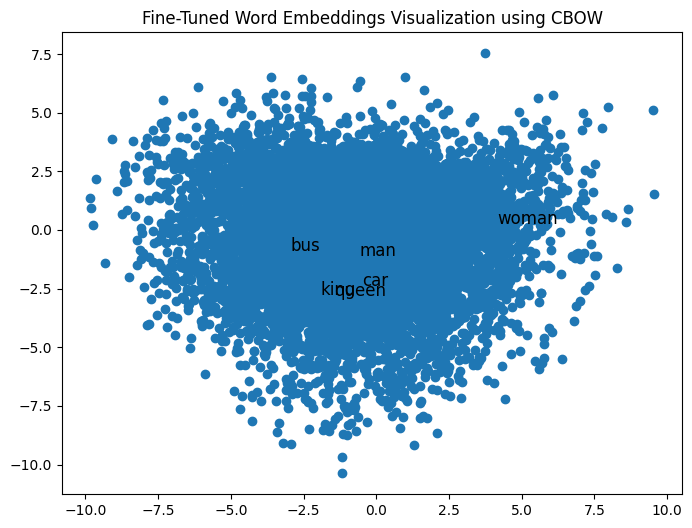

In [14]:
vectors = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Fine-Tuned Word Embeddings Visualization using CBOW")
plt.show()

## Training Word2Vec with Skip-gram

Now, we will train another Word2Vec model using a different architecture called **Skip-gram**.  
Unlike the previous CBOW approach, Skip-gram learns to predict **context words** given a target word, making it more effective for learning representations of rare words.

Repeat the previous steps:
1. Initialize a new Word2Vec model with a different training mode.
2. Train it using the **Text8 dataset** for one epoch.


In [15]:
# Your Code Here
model = Word2Vec(sentences=text8_corpus, vector_size=300, window=5, min_count=5, workers=4, sg=1)

## Compare Word Similarities (Skip-gram)
Now, we repeat the similarity comparison, but this time using the **Skip-gram** model.

- Skip-gram focuses on predicting surrounding words given a target word.
- It is better suited for smaller datasets and learns high-quality embeddings, especially for infrequent words.
- Here, we retrieve and display the most similar words for a given set of words.


In [16]:
for word in words:
    if word in model.wv.key_to_index:
        vector = model.wv[word]
        similar_words = model.wv.most_similar(word,topn=5)
        display(Markdown(f"**{word}:**"))
        for w, score in similar_words:
            display(Markdown(f"- {w}: {score:.4f}"))
    else:
        display(Markdown(f"{word} not in vocabulary."))

**king:**

- kings: 0.5928

- canute: 0.5817

- haakon: 0.5768

- queen: 0.5680

- valdemar: 0.5509

**queen:**

- elizabeth: 0.6413

- margrethe: 0.6059

- consort: 0.6046

- hrh: 0.5756

- princess: 0.5728

**man:**

- woman: 0.5216

- vanity: 0.4742

- girl: 0.4602

- luckiest: 0.4576

- shaves: 0.4552

**woman:**

- girl: 0.5583

- prostitute: 0.5432

- herself: 0.5328

- man: 0.5216

- promiscuous: 0.5134

**car:**

- cars: 0.6814

- driver: 0.6251

- motorcycle: 0.6186

- automobile: 0.5938

- truck: 0.5897

**bus:**

- buses: 0.7123

- vesa: 0.6480

- tram: 0.6407

- pci: 0.6228

- trackless: 0.6183

## Visualizing Word Embeddings (Skip-gram)
Now, we visualize the word embeddings obtained from the **Skip-gram** model.

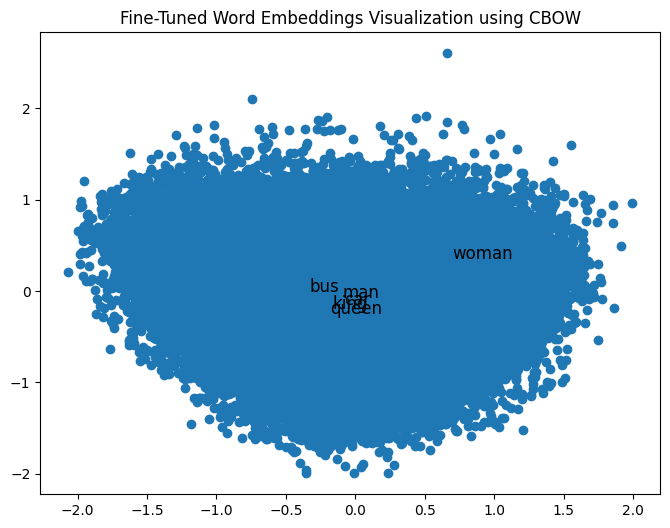

In [17]:
vectors = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Fine-Tuned Word Embeddings Visualization using CBOW")
plt.show()